WEATHER DATA DASHBOARD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("weatherHistory.csv")
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [4]:
df=df.drop_duplicates()

In [5]:

#we observe it snows when apparent temperature is negative
null=df[df['Precip Type'].isnull()]



In [6]:
# we also observe that all null values are in column precip type only
# Fill missing 'Precip Type' based on temperature
df.loc[df['Precip Type'].isnull() & (df['Apparent Temperature (C)'] > 0), 'Precip Type'] = 'rain'
df.loc[df['Precip Type'].isnull() & (df['Apparent Temperature (C)'] <= 0), 'Precip Type'] = 'snow'

null=df[df['Precip Type'].isnull()]
null
# no rows are popping meaning we have successfully handled all missing data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary


In [7]:
#we observe messy date entries
df=df.sort_values(by='Formatted Date')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
2880,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
2881,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2882,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
2883,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
2884,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
89728,2016-12-31 19:00:00.000 +0100,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.
89729,2016-12-31 20:00:00.000 +0100,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.
89730,2016-12-31 21:00:00.000 +0100,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.
89731,2016-12-31 22:00:00.000 +0100,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,Mostly cloudy throughout the day.


In [8]:
#time to refresh the indices
df=df.reset_index()
df.drop(columns=[col for col in ['index', 'level_0'] if col in df.columns], inplace=True)
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-01-01 00:00:00.000 +0100,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,0.0,1016.66,Mostly cloudy throughout the day.
1,2006-01-01 01:00:00.000 +0100,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,0.0,1016.15,Mostly cloudy throughout the day.
2,2006-01-01 02:00:00.000 +0100,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,0.0,1015.87,Mostly cloudy throughout the day.
3,2006-01-01 03:00:00.000 +0100,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,0.0,1015.56,Mostly cloudy throughout the day.
4,2006-01-01 04:00:00.000 +0100,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,0.0,1014.98,Mostly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96424,2016-12-31 19:00:00.000 +0100,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,0.0,1020.03,Mostly cloudy throughout the day.
96425,2016-12-31 20:00:00.000 +0100,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,0.0,1020.27,Mostly cloudy throughout the day.
96426,2016-12-31 21:00:00.000 +0100,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,0.0,1020.50,Mostly cloudy throughout the day.
96427,2016-12-31 22:00:00.000 +0100,Mostly Cloudy,snow,-0.472222,-3.644444,0.91,9.2414,182.0,8.4042,0.0,1020.65,Mostly cloudy throughout the day.


In [9]:
print(f"" "average temp:",df["Temperature (C)"].mean())
print(f"" "maximum temp:",df["Temperature (C)"].max())
print(f"" "minimum temp:",df["Temperature (C)"].min())
print(f"" "average humidity:",df["Humidity"].mean())
print(f"" "maximum humidity:",df["Humidity"].max())
print(f"" "minimum humidity:",df["Humidity"].min())

average temp: 11.92969167873657
maximum temp: 39.90555555555555
minimum temp: -21.822222222222223
average humidity: 0.734902052287175
maximum humidity: 1.0
minimum humidity: 0.0


In [10]:
temp_array=df['Temperature (C)'].to_numpy()
humidity_array=df['Humidity'].to_numpy()
ntemp_array = (temp_array - temp_array.min()) / (temp_array.max() - temp_array.min())
nhumidity_array = (humidity_array - humidity_array.min()) / (humidity_array.max() - humidity_array.min())
df['Temperature (C)']=ntemp_array
df['Humidity']=nhumidity_array

In [14]:
rtemp_array = [np.nan] * (6)
rhumidity_array = [np.nan] * (6)
for i in range(len(temp_array) - 8):
    avg = np.mean(temp_array[i:i + 7])
    rtemp_array.append(avg)

for i in range(len(humidity_array) - 8):
    avg = np.mean(humidity_array[i:i + 7])
    rhumidity_array.append(avg)

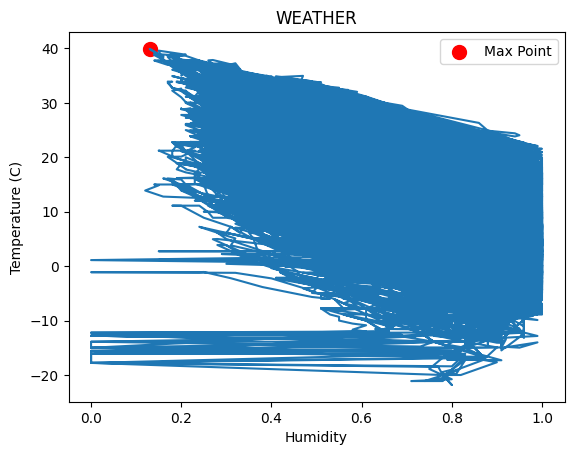

In [19]:
plt.plot(humidity_array,temp_array)
plt.xlabel("Humidity")
plt.ylabel("Temperature (C)")
max_index = np.argmax(temp_array)
max_y=temp_array[max_index]
max_x=humidity_array[max_index]
plt.scatter(max_x, max_y, color='red', s=100, label='Max Point')
plt.title("WEATHER")
plt.legend()
plt.show()